<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise6_10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10- analogous to task 5, but predicting continuous subject age and using 43 different versions of Craddock region atlas resolutions (.scorr_mean).


In [1]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 5.7 MB/s 


In [2]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib

/usr/local/lib/python3.7/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [3]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [4]:
# We prepare the model with the required parameters and the cross-validators
ridge = Ridge()
cv_outer = KFold(n_splits=10, shuffle = True, random_state=1)
cv_inner = KFold(n_splits=5, shuffle = True, random_state=1)

# We pre-allocate the variables we want to populate with accuracy scores
k_scores = []

# We create the iterating variable
versions = list(range(1,43))

In [ ]:
for x in versions:
    brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
    crad = datasets.fetch_atlas_craddock_2012()
    atlas_nii = index_img(crad['scorr_mean'], (x)) # we iterate through 'versions
    print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_data().ravel())) - 1))
    masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
    input_variables = masker.fit_transform(brain_data.gray_matter_maps)
    output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring

    X, y = input_variables, output_variable
    X = scaler.fit_transform(X)
    # We define the search grid
    grid={"alpha":np.logspace(-3,3,10)}
    # We define search
    search = GridSearchCV(ridge, grid, scoring='r2', n_jobs=1, cv=cv_inner, refit=True) # We refit the model best on the best value of 'C'
    # We execute the nested cross-validation and store the outer model scores
    scores = cross_val_score(search, X, y, scoring='r2', cv=cv_outer, n_jobs=-1)
    k_scores.append(scores)

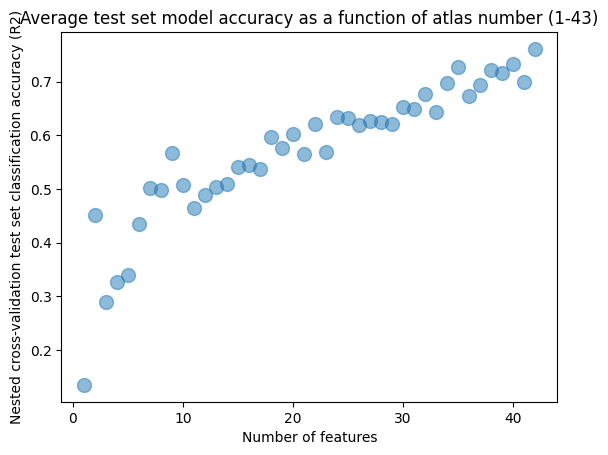

In [6]:
mean_scores = mean(k_scores,axis=1)

# We're ready to plot
plt.style.use("default")
plt.scatter(versions,mean_scores, s=100, alpha = 0.5)
plt.gca().set(
    title="Average test set model accuracy as a function of atlas number (1-43)",
    xlabel="Number of features",
    ylabel="Nested cross-validation test set classification accuracy (R2)",
)
plt.show()

Finally, we obtain the same ascending trend, this time using nested cv. 